In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# openpyxl

# 1 ETL

## 1.1 Carga de los datos

In [136]:
homicidios_df = pd.read_excel('..\Archivos_xlsx\homicidios.xlsx')

In [137]:
homicidios_df['Dirección Normalizada'] = homicidios_df['Dirección Normalizada'].str.replace('Ã‘', 'Ñ')
homicidios_df['Cruce'] = homicidios_df['Cruce'].str.replace('?', 'Ñ')

Corrige los caracteres incorrectos

## 1.2 Formatos y tipos

In [138]:
homicidios_df.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PEÑA, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÑA, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [139]:
homicidios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [140]:
homicidios_df['Altura'] = homicidios_df['Altura'].astype(object)

In [141]:
homicidios_df['TIPO_DE_CALLE'] = homicidios_df['TIPO_DE_CALLE'].astype('category')

In [142]:
homicidios_df['ACUSADO'] = homicidios_df['ACUSADO'].astype('category')
homicidios_df['VICTIMA'] = homicidios_df['VICTIMA'].astype('category')

Podemos observar que los tipos datos en las columnas son las correspondientes al tipo de dato que contienen

## 1.3 Valores nulos

In [143]:
null_counts = homicidios_df.isnull().sum()

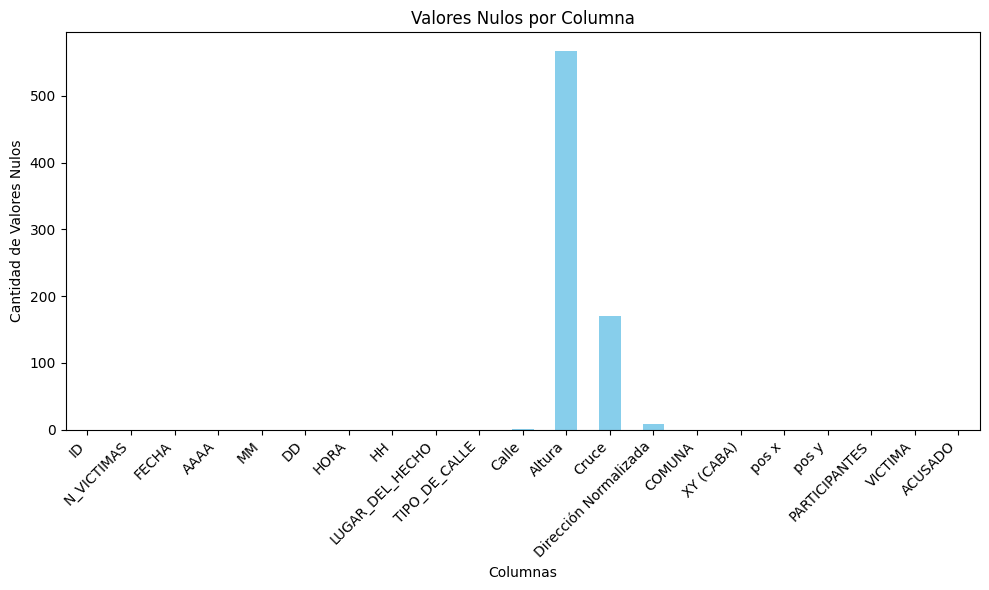

In [144]:
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='skyblue')
plt.title('Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [145]:
homicidios_df.loc[homicidios_df['Altura'].isna(), 'Altura'] = 'SD'

In [146]:
homicidios_df.loc[homicidios_df['Dirección Normalizada'].isna(), 'Dirección Normalizada'] = 'SD'

In [147]:
homicidios_df.loc[homicidios_df['Cruce'].isna(), 'Cruce'] = 'SD'

In [148]:
homicidios_df.loc[homicidios_df['Calle'].isna(), 'Calle'] = 'SD'

Rellanamos nulos con 'SD'

## 1.4 Registros duplicados

In [149]:
homicidios_df.duplicated().value_counts()

False    696
Name: count, dtype: int64

Comprobamos si hay registros duplicados y no encontramos ninguno

## 1.4 Analisis columna por columna

### 1.4.1 ```ID```

In [150]:
homicidios_df['ID'].head(10)

0    2016-0001
1    2016-0002
2    2016-0003
3    2016-0004
4    2016-0005
5    2016-0008
6    2016-0009
7    2016-0010
8    2016-0012
9    2016-0013
Name: ID, dtype: object

In [151]:
homicidios_df.set_index(pd.Index(range(1000, 1000 + len(homicidios_df))), inplace=True)
homicidios_df.rename_axis('ID', inplace=True)

Creamos un nuevo indece que funcione como identificador unico y que empiece en el valor 1000

In [152]:
homicidios_df['ID'].duplicated().value_counts()

ID
False    696
Name: count, dtype: int64

In [153]:
homicidios_df.drop(columns='ID', inplace=True)

Verificamos si hay duplicados y eliminamos la columna que funcionaba como indentificador antes del cambio

### 1.4.2 ```FECHA``` y ```HORA```

In [154]:

def combinar_fecha_y_hora(df, columna_fecha, columna_hora, nueva_columna):
    """
    Función para combinar una columna de fecha y una columna de hora en una nueva columna de tipo datetime64.
    
    Parámetros:
        - df: DataFrame de pandas.
        - columna_fecha: Nombre de la columna que contiene las fechas.
        - columna_hora: Nombre de la columna que contiene las horas.
        - nueva_columna: Nombre de la nueva columna que se creará para combinar fecha y hora.
        
    Retorna:
        El DataFrame original con la nueva columna añadida.
    """

    # Combina la fecha y la hora en una nueva columna
    df[nueva_columna] = pd.to_datetime(df[columna_fecha].astype(str) + ' ' + df[columna_hora].astype(str), errors='coerce')
    
    return df

In [155]:
combinar_fecha_y_hora(homicidios_df, 'FECHA', 'HORA', 'FECHA_Y_HORA').head()

,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,FECHA_Y_HORA
ID,,,,,,,,,,,,,,,,,,,,,
1000,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,2016-01-01 04:00:00
1001,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,2016-01-02 01:15:00
1002,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,...,SD,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,2016-01-03 07:00:00
1003,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,...,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,2016-01-10 00:00:00
1004,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,...,"SAENZ PEÑA, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÑA, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,2016-01-21 05:20:00


Combinamos la columna ```FECHA``` y ```HORA``` en una nueva llamada ```FECHA_Y_HORA```

In [156]:
homicidios_df.drop(columns=['AAAA', 'MM', 'DD', 'HH', 'FECHA', 'HORA'], inplace=True)

Eliminamos columnas redundantes

### 1.4.3 ```LUGAR_DEL_HECHO```, ```TIPO_DE_CALLE``` y ```Calle```

In [157]:
homicidios_df.drop(columns=['Dirección Normalizada', 'Cruce', 'Altura', 'Calle'], inplace=True)

Eliminamos columnas redundantes

In [158]:
homicidios_df['TIPO_DE_CALLE'].value_counts()

TIPO_DE_CALLE
AVENIDA      429
CALLE        136
AUTOPISTA     66
GRAL PAZ      65
Name: count, dtype: int64

In [159]:
homicidios_df.loc[homicidios_df['TIPO_DE_CALLE'] == 'GRAL PAZ', 'TIPO_DE_CALLE'] = 'AUTOPISTA'

Corregimos valores ya que 'la Gral. Paz' es una autopista

### 1.4.4 ```XY(CABA)```, ```pos x``` y ```pos y```

In [160]:
homicidios_df.drop(columns='XY (CABA)', inplace=True)

In [161]:
homicidios_df.rename(columns={'pos x': 'LONGITUD'}, inplace=True)
homicidios_df.rename(columns={'pos y': 'LATITUD'}, inplace=True)

In [162]:
homicidios_df.drop(1139, inplace=True)
homicidios_df.drop(1119, inplace=True)

Elimino registros vacios

In [163]:
def rellenar_lat_long(df):
    # Crear un diccionario de comuna a índices de registros
    indices_por_comuna = {}
    for i, row in df.iterrows():
        comuna = row['COMUNA']
        if comuna not in indices_por_comuna:
            indices_por_comuna[comuna] = []
        indices_por_comuna[comuna].append(i)
    
    # Iterar sobre los registros y rellenar las latitudes y longitudes faltantes
    for i, row in df.iterrows():
        latitud = row['LATITUD']
        longitud = row['LONGITUD']
        comuna = row['COMUNA']
        
        # Si la latitud o la longitud son ".", encontrar un registro aleatorio en la misma comuna y tomar sus valores
        if latitud == '.' or longitud == '.':
            indices_comuna = indices_por_comuna[comuna]
            registro_aleatorio = df.loc[np.random.choice(indices_comuna)]
            if latitud == '.':
                latitud = registro_aleatorio['LATITUD']
            if longitud == '.':
                longitud = registro_aleatorio['LONGITUD']
        
        # Asignar los nuevos valores de latitud y longitud al DataFrame
        df.at[i, 'LATITUD'] = latitud
        df.at[i, 'LONGITUD'] = longitud
    
    return df

Esto llenará los valores de latitud y longitud faltantes con valores aleatorios de la misma comuna

In [164]:
homicidios_df = rellenar_lat_long(homicidios_df)

In [183]:
homicidios_df[homicidios_df['LATITUD'] == "."]

,N_VICTIMAS,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,LONGITUD,LATITUD,VICTIMA,ACUSADO,FECHA_Y_HORA,FATAL
ID,,,,,,,,,,


Corregimos el nombre de las columnas 

### 1.4.5 ```PARTICIPANTES```

In [165]:
homicidios_df.drop(columns='PARTICIPANTES', inplace=True)

In [166]:
# Imprimir la cantidad de 'SD'
print((homicidios_df['VICTIMA'] == 'SD').sum())
# Imprimir la cantidad de 'SD'
print((homicidios_df['ACUSADO'] == 'SD').sum())

8
21


Eliminamos columnas redundates

In [167]:
homicidios_df['VICTIMA'].value_counts()

VICTIMA
MOTO           295
PEATON         263
AUTO            83
BICICLETA       29
SD               8
CARGAS           7
PASAJEROS        5
MOVIL            2
OBJETO FIJO      1
PEATON_MOTO      1
Name: count, dtype: int64

In [168]:
# Definir el mapeo de categorías a cambiar
category_mapping = {"BICICLETA": "CICLISTA", "CARGAS": "CAMION", "PEATON_MOTO": "MOTO", "MOVIL": "AUTO", "PASAJEROS": "PEATON"}
# Reemplazar las categorías especificadas en la columna
homicidios_df["VICTIMA"] = homicidios_df["VICTIMA"].replace(category_mapping)

C:\Users\Luka\AppData\Local\Temp\ipykernel_1696\720124344.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  homicidios_df["VICTIMA"] = homicidios_df["VICTIMA"].replace(category_mapping)


In [169]:
homicidios_df['ACUSADO'].value_counts()

ACUSADO
AUTO           204
PASAJEROS      173
CARGAS         146
OBJETO FIJO     62
MOTO            57
SD              21
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: count, dtype: int64

In [170]:
# Definir el mapeo de categorías a cambiar
category_mapping = {"PASAJEROS": "PEATON", "CARGAS": "CAMION", "PEATON_MOTO": "MOTO", "MULTIPLE": "SD", "BICICLETA": "CICLISTA", "OTRO": "SD", 'TREN': "SD"}
# Reemplazar las categorías especificadas en la columna
homicidios_df["ACUSADO"] = homicidios_df["ACUSADO"].replace(category_mapping)

C:\Users\Luka\AppData\Local\Temp\ipykernel_1696\1858565178.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  homicidios_df["ACUSADO"] = homicidios_df["ACUSADO"].replace(category_mapping)


Arreglo valores categoricos

### 1.4.6 ```FATAL```

In [171]:
homicidios_df['FATAL'] = True

Establecemos la columna `FATAL` en `True` ya que sabemos que los registros de estos siniestros tuvieron todos victimas mortales

## 1.5 Guardar en csv

In [172]:
homicidios_df.to_csv('../Archivos_csv/homicidios.csv')

# 2 EDA

In [173]:
homicidios_df.head()

,N_VICTIMAS,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,LONGITUD,LATITUD,VICTIMA,ACUSADO,FECHA_Y_HORA,FATAL
ID,,,,,,,,,,
1000,1,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,-58.47533969,-34.68757022,MOTO,AUTO,2016-01-01 04:00:00,True
1001,1,AV GRAL PAZ Y AV DE LOS CORRALES,AUTOPISTA,9,-58.50877521,-34.66977709,AUTO,PEATON,2016-01-02 01:15:00,True
1002,1,AV ENTRE RIOS 2034,AVENIDA,1,-58.39040293,-34.63189362,MOTO,AUTO,2016-01-03 07:00:00,True
1003,1,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,8,-58.46503904,-34.68092974,MOTO,SD,2016-01-10 00:00:00,True
1004,1,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,1,-58.38718297,-34.62246630,MOTO,PEATON,2016-01-21 05:20:00,True


## 2.1 ```N_VICTIMAS```

<Axes: xlabel='N_VICTIMAS', ylabel='Count'>

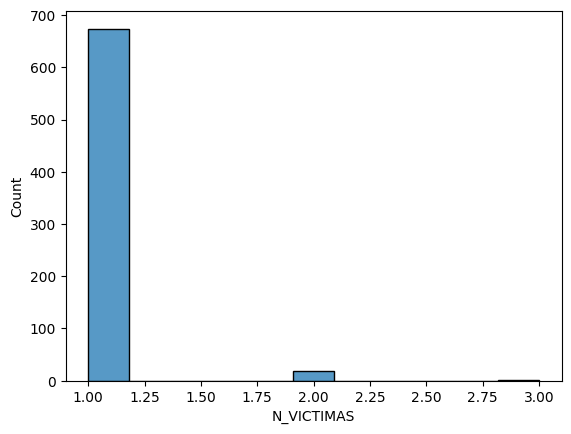

In [174]:
plt.figure()
sns.histplot(data=homicidios_df, x='N_VICTIMAS')

Se puede observar que casi en su totalidad los registros implican una sola victima

## 2.2 ```TIPO_DE_CALLE```

<Axes: xlabel='TIPO_DE_CALLE', ylabel='Count'>

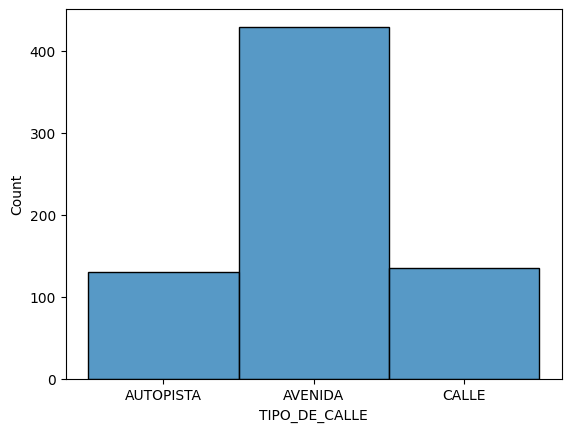

In [175]:
plt.figure()
sns.histplot(data=homicidios_df, x='TIPO_DE_CALLE')

La mayoria de los incidentes ocurren en una avenida siendo que triplica en comparación a los mismos en las autopistas y las calles

## 2.3 ```COMUNA```

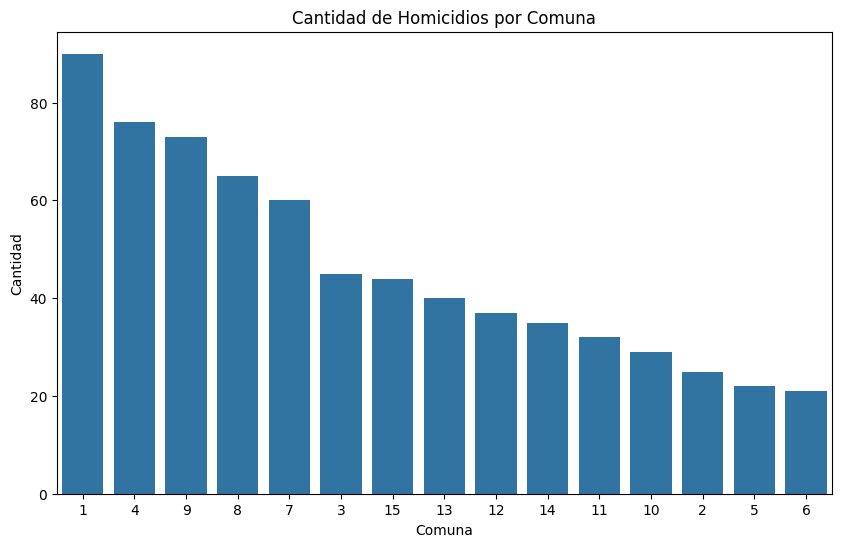

In [176]:
# Calcular la frecuencia de cada categoría
comuna_counts = homicidios_df['COMUNA'].value_counts()

# Ordenar las comunas de menor a mayor frecuencia
comuna_order = comuna_counts.index

# Crear el gráfico de barras con orden de menor a mayor
plt.figure(figsize=(10, 6))
sns.countplot(data=homicidios_df, x='COMUNA', order=comuna_order)
plt.xlabel('Comuna')
plt.ylabel('Cantidad')
plt.title('Cantidad de Homicidios por Comuna')
plt.show()

Se puede observar una distribuciòn normal sobre los incidentes ocurridos en las diferentes comunas siendo en donde mas se presentan es en la 'comuna 1' y en donde menos es en la 'comuna 6'

## 2.4 ```VICTIMA``` Y ```ACUSADO```

In [177]:
# Obtener las frecuencias_victimas de cada valor en la columna 'VICTIMA'
frecuencias_victimas = homicidios_df['VICTIMA'].value_counts()

# Definir un umbral para el número de valores únicos que se mostrarán individualmente
umbral = 4

# Si hay más de umbral valores únicos, agrupar los menos frecuentes en 'Otros'
if len(frecuencias_victimas) > umbral:
    top_valores_victimas = frecuencias_victimas[:umbral]
    otros_valores = frecuencias_victimas[umbral:].sum()
    top_valores_victimas['Otros'] = otros_valores
else:
    top_valores_victimas = frecuencias_victimas

In [178]:
# Obtener las frecuencias_acusado de cada valor en la columna 'ACUSADO'
frecuencias_acusado = homicidios_df['ACUSADO'].value_counts()

# Definir un umbral para el número de valores únicos que se mostrarán individualmente
umbral = 7

# Si hay más de umbral valores únicos, agrupar los menos frecuentes en 'Otros'
if len(frecuencias_acusado) > umbral:
    top_valores_acusado = frecuencias_acusado[:umbral]
    otros_valores = frecuencias_acusado[umbral:].sum()
    top_valores_acusado['Otros'] = otros_valores
else:
    top_valores_acusado = frecuencias_acusado

Creo que la categoria 'otros' para las columnas ```VICTIMA``` Y ```ACUSADO``` para se mejore la visibilidad en la visualizaciòn

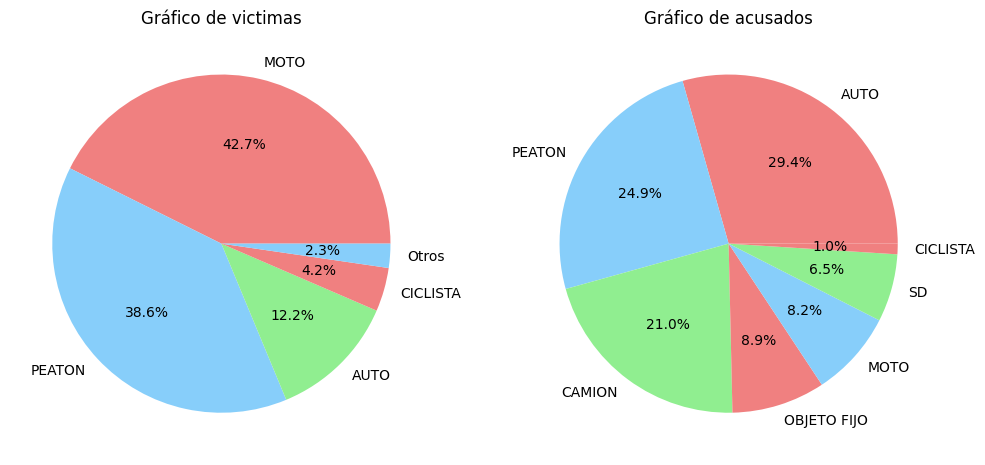

In [179]:
# Crear la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Primer gráfico de torta
ax1.pie(top_valores_victimas, labels=top_valores_victimas.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen'])
ax1.set_title('Gráfico de victimas')


# Segundo gráfico de torta
ax2.pie(top_valores_acusado, labels=top_valores_acusado.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen'])
ax2.set_title('Gráfico de acusados')


plt.show()

Las victimas en la mayoria de casos suelen ser ```MOTO``` y ```PEATON``` como era de esperase y los acusados suelen ser ```AUTO```, ```CARGAS``` Y ```PASAJEROS``` 

## 2.5 ```FECHA_Y_HORA```

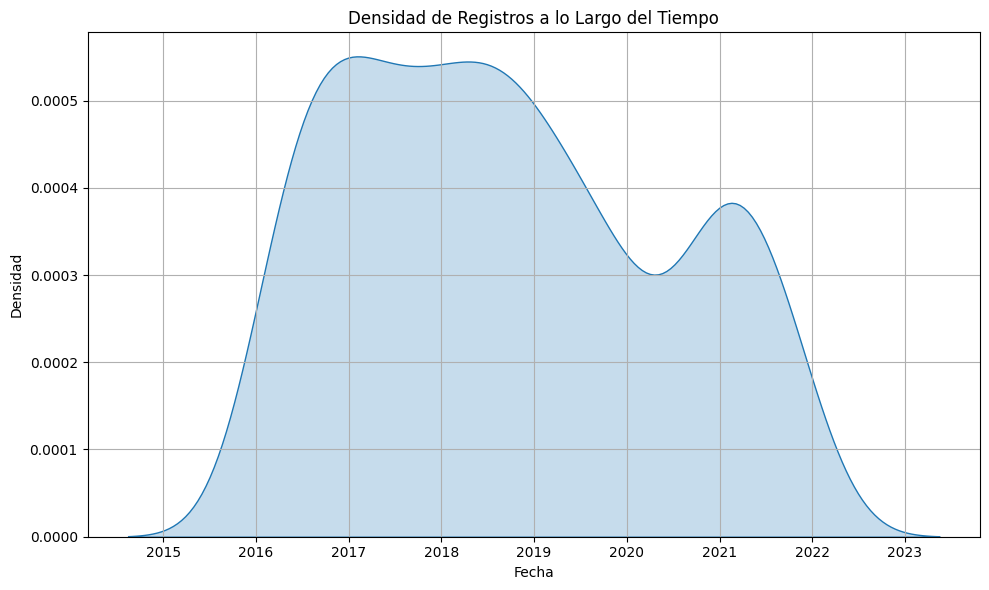

In [180]:
# Crear un gráfico de densidad de kernel utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=homicidios_df['FECHA_Y_HORA'], fill=True)

# Etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Densidad')
plt.title('Densidad de Registros a lo Largo del Tiempo')

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

Atravez de este grafico de densidad de kernel podemos ver a lo largo del tiempo como se presenta ``una distribuciòn Sesgada a la izquierda`` (o negativa), como su pico llegò en el '2017' y a mediados del '2018' este empezo a decrecer.